In [1]:
import gensim
from gensim.models import Word2Vec
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import os

In [24]:
import numpy as np

## 2차원 학습

In [2]:
nouns = []
with open('/storage/rok/Korean_Embedding/corpus_nouns.txt', 'r') as f:
    for sentence in tqdm(f.readlines()):
        nouns.append(sentence.split())

def w2v(data, sg, name):
    
    begin = datetime.now()
    model = Word2Vec(sentences=data, vector_size=2, window=5, min_count=5, workers=8, sg=sg)
    end = datetime.now() - begin
    print(end)
    
    return model

model_2 = w2v(data=nouns, sg=1, name='nouns')
model_2.wv.most_similar('코로나', topn=10)

100%|██████████| 844013/844013 [00:21<00:00, 39394.80it/s]


0:09:57.537813


[('화서동', 1.0000001192092896),
 ('노카', 1.0000001192092896),
 ('부와', 1.0000001192092896),
 ('북로', 1.0000001192092896),
 ('화재', 1.0000001192092896),
 ('최재열', 1.0),
 ('고해상도', 1.0),
 ('통신사', 1.0),
 ('군량리', 1.0),
 ('컨퍼런스', 1.0)]

In [3]:
#모델 저장
model_2.save('./w2v_model_2/model_2')

In [4]:
del nouns

## 100차원 학습

In [ ]:
def w2v_100(data, sg, name):
    
    begin = datetime.now()
    model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=5, workers=8, sg=sg)
    end = datetime.now() - begin
    print(end)
    
    return model

model_100 = w2v_100(data=nouns, sg=1, name='nouns')
model_100.wv.most_similar('코로나', topn=10)

In [ ]:
#모델 저장
model_100.save('./w2v_model_100/model_100')

In [10]:
model_100= gensim.models.Word2Vec.load('./w2v_model_100/model_100')

In [17]:
model_2.wv.most_similar('여름', topn=10)

[('동예루살렘', 1.0000001192092896),
 ('단초', 1.0000001192092896),
 ('변통', 1.0000001192092896),
 ('한관', 1.0000001192092896),
 ('측은', 1.0000001192092896),
 ('홍상표', 1.0000001192092896),
 ('이동일', 1.0),
 ('조연경', 1.0),
 ('김형기', 1.0),
 ('안동우', 1.0)]

In [18]:
model_100.wv.most_similar('여름', topn=10)

[('여름철', 0.7057121992111206),
 ('올여름', 0.6921871900558472),
 ('다립', 0.6887524724006653),
 ('바캉스', 0.6848115921020508),
 ('방학', 0.6845771670341492),
 ('삼복더위', 0.6685144901275635),
 ('무더위', 0.6655951142311096),
 ('늦장마', 0.6617226004600525),
 ('가요대전', 0.6583240032196045),
 ('치휴', 0.6530247926712036)]

### 시각화

In [35]:
import matplotlib.pyplot as plt

In [ ]:
words = ['사과', '돼지', '컴퓨터', '자동차', '노트북', '인형', '남자', '여자', '엄마', '아빠', '누나', '오빠', '언니', '코로나']

### 2차원 임베딩 시각화

In [48]:
m2_x = [model_2.wv[w][0] for w in words]
m2_y = [model_2.wv[w][1] for w in words]

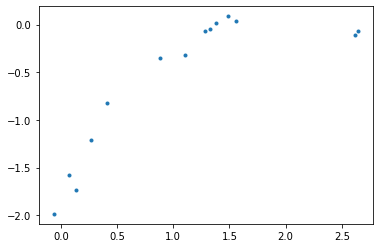

In [49]:
plt.plot(m2_x, m2_y , linestyle='', marker='.')

### 100차원 --> PCA 2차원 시각화

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
X = np.array([model_100.wv[i] for i in words])

In [30]:
X_ = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

In [41]:
pc_x = [i[0] for i in pc]

In [42]:
pc_y = [i[1] for i in pc]

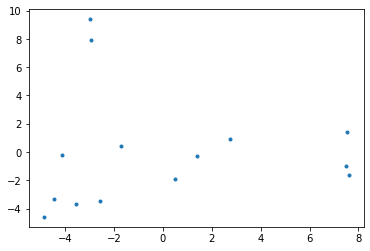

In [43]:
plt.plot(pc_x, pc_y , linestyle='', marker='.')

### 100차원 --> t-SNE 2차원 시각화

In [32]:
from sklearn.manifold import TSNE

In [33]:
X_tsne = TSNE(n_components = 2).fit_transform(X)

/storage/rok/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/storage/rok/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [34]:
X_tsne

array([[-110.850426  , -101.46662   ],
       [-251.47945   ,  -98.71067   ],
       [-136.90762   , -231.40152   ],
       [-179.33788   ,  169.0495    ],
       [  71.47731   ,   46.107285  ],
       [ -43.593174  ,   99.414116  ],
       [  20.279512  , -197.70564   ],
       [ 137.89809   , -102.59902   ],
       [ 203.88815   ,   44.0171    ],
       [ -46.07888   ,  239.24828   ],
       [  97.549355  ,  184.11205   ],
       [-276.5079    ,   53.500267  ],
       [  -0.47216246,  -51.499176  ],
       [-140.36601   ,   21.864996  ]], dtype=float32)

In [45]:
tsne_x = [i[0] for i in X_tsne]

In [44]:
tsne_y = [i[1] for i in X_tsne]

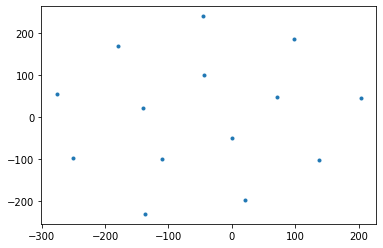

In [46]:
plt.plot(tsne_x, tsne_y , linestyle='', marker='.')